Evan McLaughlin <br>
Vladimir Nimchenko <br>

YouTube Presentation: https://youtu.be/OLUnhxE94o0

In [44]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random

# First we load the dataset and create our first bipartite graph
data = pd.read_csv("https://raw.githubusercontent.com/evanmclaughlin/DATA-620/main/movies.csv")
G = nx.Graph()
G.add_nodes_from(data['user_id'], bipartite=0)
G.add_nodes_from(data['movie'], bipartite=1)
G.add_edges_from(zip(data['user_id'], data['movie']))
print(data.head())

   Unnamed: 0  user_id                                             movie
0           0        1                               Pulp Fiction (1994)
1           1        1  Three Colors: Red (Trois couleurs: Rouge) (1994)
2           2        1  Three Colors: Blue (Trois couleurs: Bleu) (1993)
3           3        1                                Underground (1995)
4           4        1                        Singin' in the Rain (1952)


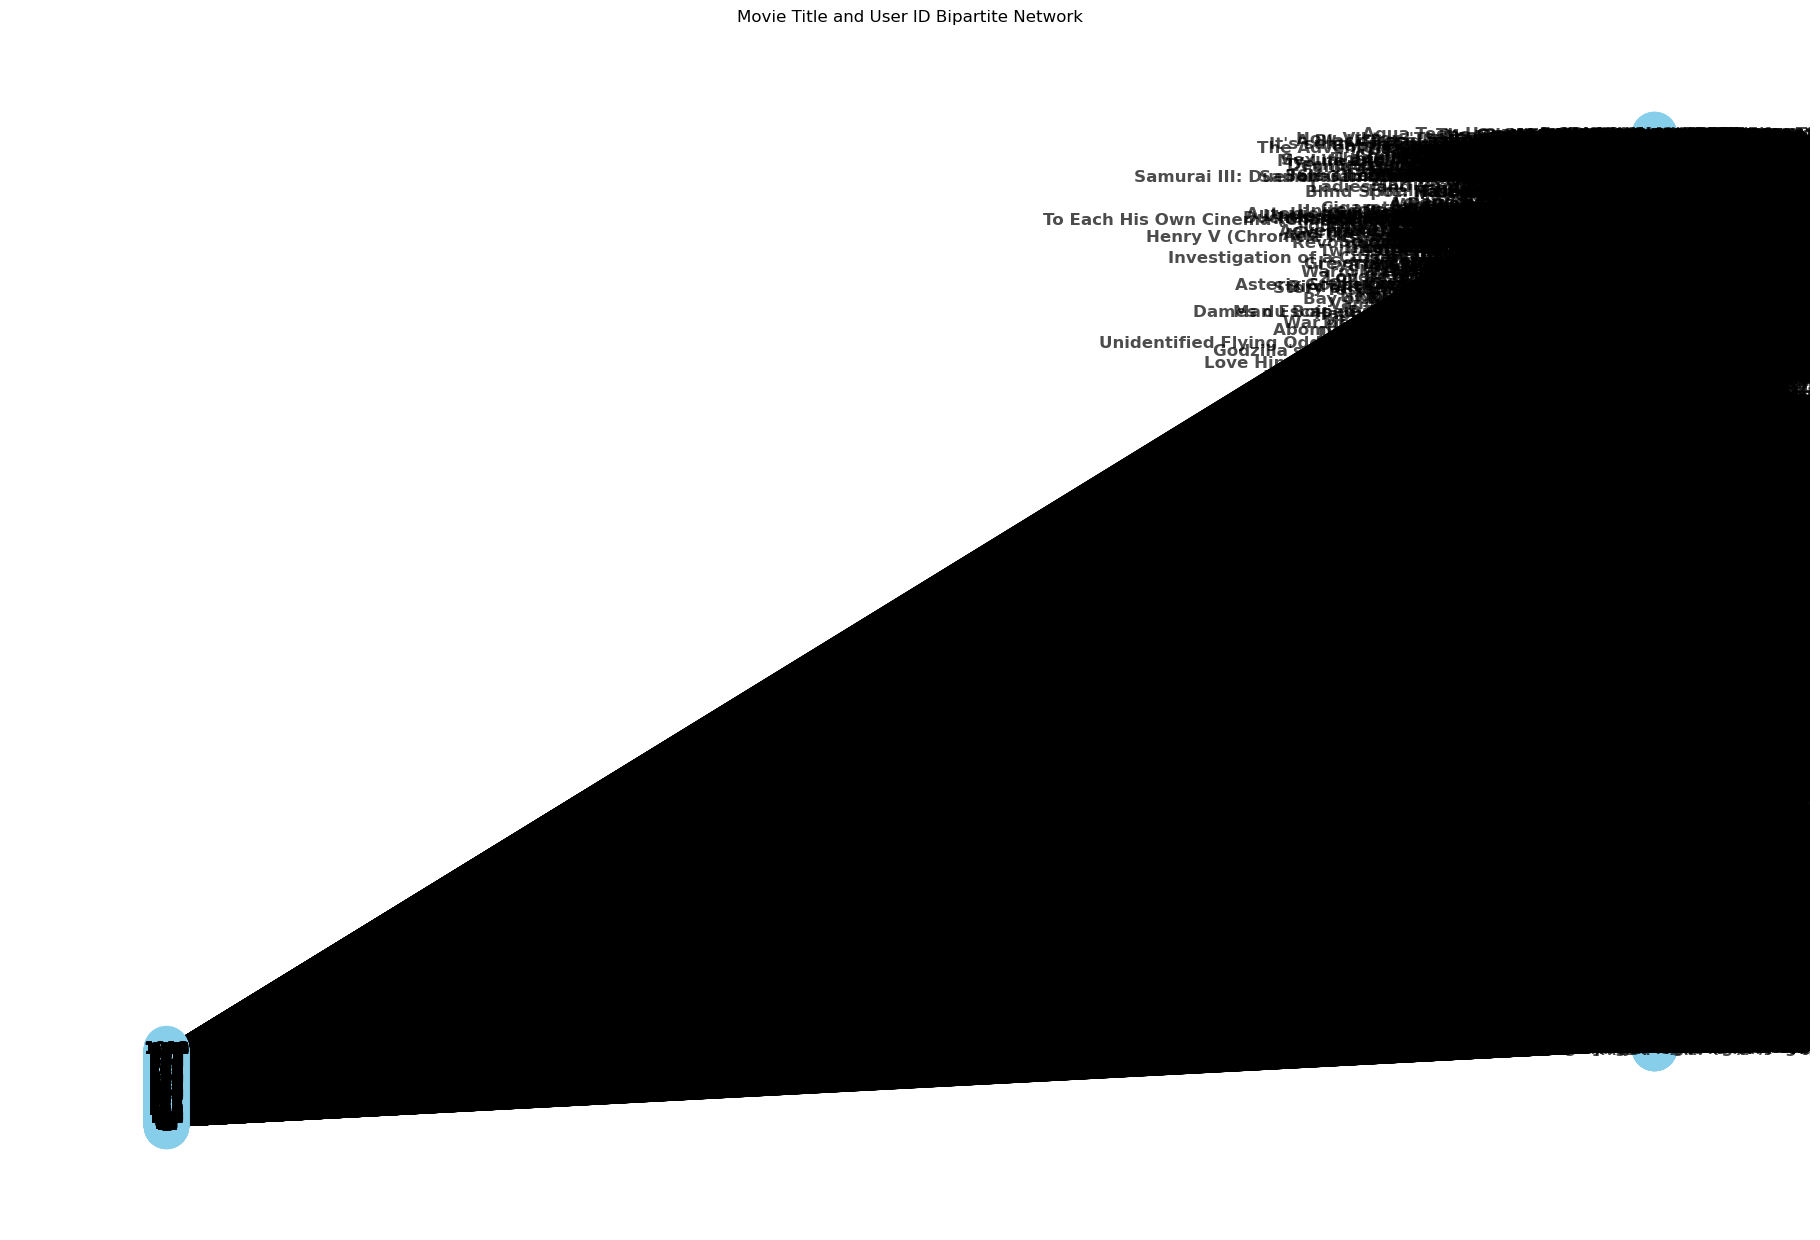

In [45]:
# Let's take a look at a bipartite graph of the full dataset
plt.figure(figsize=(18, 12))
pos = {
    node: (1, i) if data['bipartite'] == 0 else
    (2, i) for i, (node, data) in enumerate(G.nodes(data=True))
}

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue', width=2, alpha=0.7)

plt.title('Movie Title and User ID Bipartite Network')
plt.show()

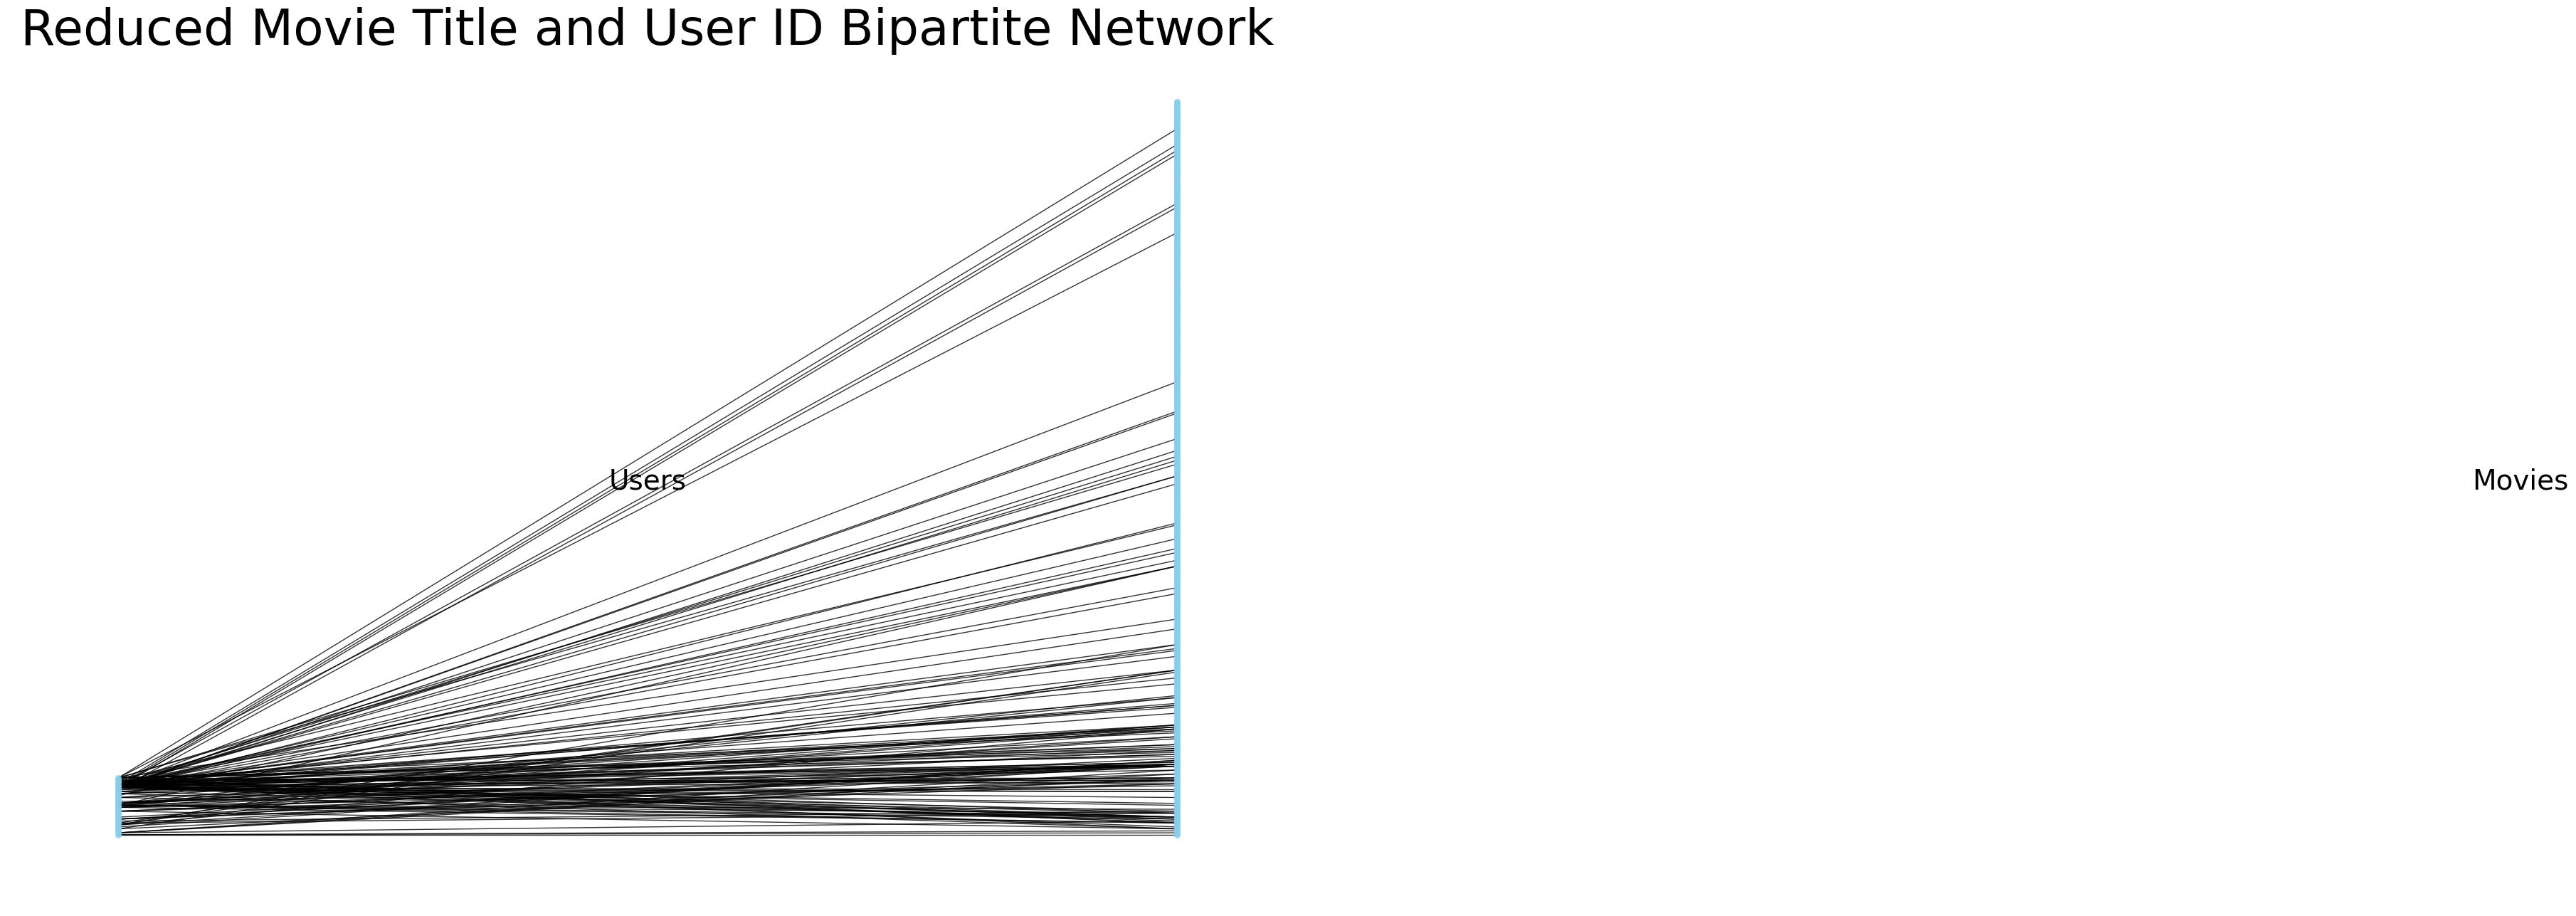

In [46]:
# The graph above is a complete mess. We need to reduce the network size and remove the movie titles from the next graph.
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

# First let's create a function to reduce the size of the network using the island method, followed by reducing the size of the graph
def island_method(graph, iterations=5, removal_fraction=0.60):
    for _ in range(iterations):
        # Identify nodes with low degrees
        nodes_to_remove = random.sample(list(graph.nodes()), int(removal_fraction * len(graph)))
        graph.remove_nodes_from(nodes_to_remove)
    return graph

G_reduced = island_method(G.copy(), iterations=5, removal_fraction=0.50)

plt.figure(figsize=(18, 12))

# keep movies and users separate and position each set of nodes, enhanced for clarity
movies_reduced = [node for node, data in G_reduced.nodes(data=True) if data['bipartite'] == 0]
users_reduced = [node for node, data in G_reduced.nodes(data=True) if data['bipartite'] == 1]

pos_reduced = {}
for i, movie in enumerate(movies_reduced):
    pos_reduced[movie] = (1, i)
for i, user in enumerate(users_reduced):
    pos_reduced[user] = (3, i)  

# Adjust the parameters a bit and increase node size for clarity and readability
nx.draw(G_reduced, pos_reduced, with_labels=False, node_size=30, node_color='skyblue', width=1, alpha=0.8)
plt.text(0.5, 0.5, 'Users', horizontalalignment='center', verticalalignment='center', fontsize=28, transform=plt.gca().transAxes)
plt.text(2, 0.5, 'Movies', horizontalalignment='right', verticalalignment='center', fontsize=28, transform=plt.gca().transAxes)

plt.title('Reduced Movie Title and User ID Bipartite Network', fontsize=50)
plt.show()


In [47]:
'''

The condensed bipartite network display implies that, following the implementation of the island method, the complexity of the original network has been somewhat simplified. By eliminating a majority of low-degree nodes, less significant connections, the emphasis is now on stronger connections between movies and user IDs. This visualization brings a sharper focus to more influential relationships, potentially aiding in the identification of patterns and trends in user IDs within the dataset.In general, the simplified network enables a more straightforward analysis of the fundamental structure and connections present in the movies - user ID dataset.

This is still a very, very large dataset. To generate any inferences through projections and subgraph analysis, we'll need to reduce it further.


'''

"\n\nThe condensed bipartite network display implies that, following the implementation of the island method, the complexity of the original network has been somewhat simplified. By eliminating a majority of low-degree nodes, less significant connections, the emphasis is now on stronger connections between movies and user IDs. This visualization brings a sharper focus to more influential relationships, potentially aiding in the identification of patterns and trends in user IDs within the dataset.In general, the simplified network enables a more straightforward analysis of the fundamental structure and connections present in the movies - user ID dataset.\n\nThis is still a very, very large dataset. To generate any inferences through projections and subgraph analysis, we'll need to reduce it further.\n\n\n"

In [48]:
# Next we will create our subgraph analysis and projections on the reduced network; next we get connected component
# This produces a connected component on a further reduced dataset
reduced_cc = max(nx.connected_components(G_reduced), key=len)
reduced_G = G.subgraph(reduced_cc).copy()

# We can generate sets from the reduced network and produce a subgraph analysis / projections
user_nodes = {n for n, d in reduced_G.nodes(data=True) if d['bipartite'] == 0}
movie_nodes = set(reduced_G) - user_nodes
user_subgraph = reduced_G.subgraph(user_nodes)
movie_subgraph = reduced_G.subgraph(movie_nodes)
user_projection = nx.bipartite.weighted_projected_graph(reduced_G, user_nodes)
movie_projection = nx.bipartite.weighted_projected_graph(reduced_G, movie_nodes)


In [1]:
# We can next run our centrality measures on the reduced network and visualize everything below in graphics and tables
user_degree = dict(nx.degree(reduced_G))
movie_degree = dict(nx.degree(reduced_G))

user_degree_centrality = nx.degree_centrality(reduced_G)
movie_degree_centrality = nx.degree_centrality(reduced_G)

user_closeness_centrality = nx.closeness_centrality(reduced_G)
movie_closeness_centrality = nx.closeness_centrality(reduced_G)

user_betweenness_centrality = nx.betweenness_centrality(reduced_G, normalized=True, endpoints=False)
movie_betweenness_centrality = nx.betweenness_centrality(reduced_G, normalized=True, endpoints=False)


NameError: name 'nx' is not defined

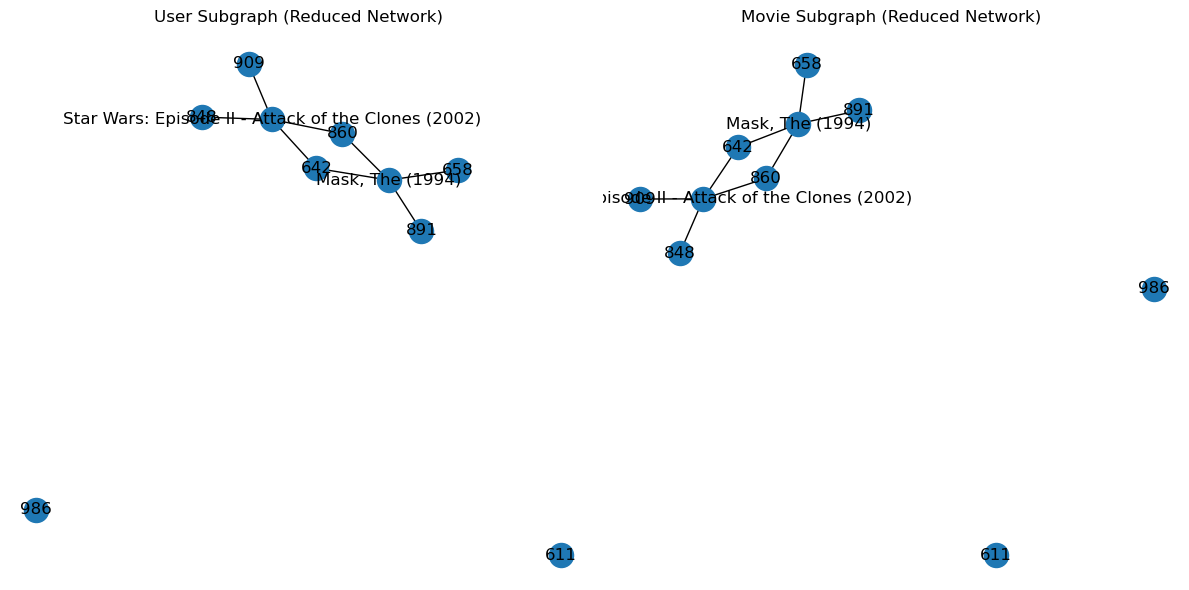

In [50]:

# Visualization of central nodes on the reduced network and top central nodes for visualization
top_users = sorted(user_degree_centrality, key=user_degree_centrality.get, reverse=True)[:10]
top_movies = sorted(movie_degree_centrality, key=movie_degree_centrality.get, reverse=True)[:10]

user_subgraph = G.subgraph(top_users)
movie_subgraph = G.subgraph(top_movies)

# Plot subgraphs
plt.figure(figsize=(12, 6))

plt.subplot(121)
nx.draw(user_subgraph, with_labels=True)
plt.title("User Subgraph (Reduced Network)")

plt.subplot(122)
nx.draw(movie_subgraph, with_labels=True)
plt.title("Movie Subgraph (Reduced Network)")

plt.tight_layout()
plt.show()


In [51]:

# View tables for centrality measures for both user IDs and movies
centrality_table = pd.DataFrame({
    'User ID': data['user_id'],
    'Movie': data['movie'],
    'User Degree': user_degree,
    'Movie Degree': movie_degree,
    'User Degree Centrality': user_degree_centrality,
    'Movie Degree Centrality': movie_degree_centrality,
    'User Closeness Centrality': user_closeness_centrality,
    'Movie Closeness Centrality': movie_closeness_centrality,
    'User Betweenness Centrality': user_betweenness_centrality,
    'Movie Betweenness Centrality': movie_betweenness_centrality
})

print(centrality_table)


                            User ID  \
0                               1.0   
1                               1.0   
2                               1.0   
3                               1.0   
4                               1.0   
...                             ...   
Unforgiven (1992)               NaN   
Vertigo (1958)                  NaN   
Waiting for Guffman (1996)      NaN   
Warm Bodies (2013)              NaN   
Wild Wild West (1999)           NaN   

                                                                       Movie  \
0                                                        Pulp Fiction (1994)   
1                           Three Colors: Red (Trois couleurs: Rouge) (1994)   
2                           Three Colors: Blue (Trois couleurs: Bleu) (1993)   
3                                                         Underground (1995)   
4                                                 Singin' in the Rain (1952)   
...                                                

Based on the output above, we can generate a few observations:

    - The User Degree and Movie Degree columns represent the number of connections each user or movie node has in the network. Higher numbers in this field more highly-connected users or movies.
    - The degree centrality figures represent "relative importance" or the user or movie based on its connectedness to other nodes. Movies that earn the top spot in this are more central in terms of their degrees.
    -  The closeness figures represent how close each user or movie is to all other nodes in the network. Higher values indicate that a user or movie is closer to all other nodes, suggesting that it can reach other nodes more quickly. Oftentimes movies that scored higher in previous centrality measures continued to outperform other movies as their closeness and betweenness score (the extent to which the node has the shortest paths to other pairs) earn the highest scores.




The analysis of the network uncovers clear user communities and movie clusters, while centrality measures pinpoint pivotal users and popular movies, enabling targeted interventions or recommendations. Visualizations enhance comprehension of network structure and node significance. In conclusion, this analysis provides valuable insights into user-movie interactions and network dynamics. Future endeavors may involve delving into temporal patterns, integrating supplementary metadata, or employing advanced network analysis methods for deeper understanding.





